<a href="https://colab.research.google.com/github/lakshitgosain/Transformers-for-NLP/blob/main/Transformers_I02_NER_POS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#NER and POS

The data will be in the format of data inputs and output tags

Tokenization- We would need to split the string into words for NER classification for each token

In [2]:
!pip install datasets transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 65.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 81.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 59.6 MB/s eta 0:00:00


In [3]:
from datasets import load_dataset

In [4]:
data=load_dataset("conll2003")

Generating train split:   0%|          | 0/14041 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/3250 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/3453 [00:00<?, ? examples/s]

Dataset conll2003 downloaded and prepared to /root/.cache/huggingface/datasets/conll2003/conll2003/1.0.0/9a4d16a94f8674ba3466315300359b0acd891b68b6c8743ddf60b9c702adce98. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [8]:
data #Tokens are the words and not the tokens that we end up with after preprocessing

DatasetDict({
    train: Dataset({
        features: ['id', 'tokens', 'pos_tags', 'chunk_tags', 'ner_tags'],
        num_rows: 14041
    })
    validation: Dataset({
        features: ['id', 'tokens', 'pos_tags', 'chunk_tags', 'ner_tags'],
        num_rows: 3250
    })
    test: Dataset({
        features: ['id', 'tokens', 'pos_tags', 'chunk_tags', 'ner_tags'],
        num_rows: 3453
    })
})

In [9]:
data['train'][0]

{'id': '0',
 'tokens': ['EU',
  'rejects',
  'German',
  'call',
  'to',
  'boycott',
  'British',
  'lamb',
  '.'],
 'pos_tags': [22, 42, 16, 21, 35, 37, 16, 21, 7],
 'chunk_tags': [11, 21, 11, 12, 21, 22, 11, 12, 0],
 'ner_tags': [3, 0, 7, 0, 0, 0, 7, 0, 0]}

In [10]:
data['train'].features

{'id': Value(dtype='string', id=None),
 'tokens': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None),
 'pos_tags': Sequence(feature=ClassLabel(names=['"', "''", '#', '$', '(', ')', ',', '.', ':', '``', 'CC', 'CD', 'DT', 'EX', 'FW', 'IN', 'JJ', 'JJR', 'JJS', 'LS', 'MD', 'NN', 'NNP', 'NNPS', 'NNS', 'NN|SYM', 'PDT', 'POS', 'PRP', 'PRP$', 'RB', 'RBR', 'RBS', 'RP', 'SYM', 'TO', 'UH', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'WDT', 'WP', 'WP$', 'WRB'], id=None), length=-1, id=None),
 'chunk_tags': Sequence(feature=ClassLabel(names=['O', 'B-ADJP', 'I-ADJP', 'B-ADVP', 'I-ADVP', 'B-CONJP', 'I-CONJP', 'B-INTJ', 'I-INTJ', 'B-LST', 'I-LST', 'B-NP', 'I-NP', 'B-PP', 'I-PP', 'B-PRT', 'I-PRT', 'B-SBAR', 'I-SBAR', 'B-UCP', 'I-UCP', 'B-VP', 'I-VP'], id=None), length=-1, id=None),
 'ner_tags': Sequence(feature=ClassLabel(names=['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC', 'B-MISC', 'I-MISC'], id=None), length=-1, id=None)}

In [11]:
data['train'].features['ner_tags']

Sequence(feature=ClassLabel(names=['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC', 'B-MISC', 'I-MISC'], id=None), length=-1, id=None)

In [12]:
data['train'].features['ner_tags'].feature.names

['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC', 'B-MISC', 'I-MISC']

In [13]:
#Save for later
label_names=data['train'].features['ner_tags'].feature.names

In [14]:
from transformers import AutoTokenizer

checkpoint='distilbert-base-cased' #Casing will help our modelling better. Bill-name, bill-dollar bill name
tokenizer=AutoTokenizer.from_pretrained(checkpoint)

In [16]:
idx=0
t=tokenizer(data['train'][idx]['tokens'], is_split_into_words=True)

In [17]:
t

{'input_ids': [101, 7270, 22961, 1528, 1840, 1106, 21423, 1418, 2495, 12913, 119, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [18]:
type(t)

transformers.tokenization_utils_base.BatchEncoding

In [19]:
t.tokens()

['[CLS]',
 'EU',
 'rejects',
 'German',
 'call',
 'to',
 'boycott',
 'British',
 'la',
 '##mb',
 '.',
 '[SEP]']

Now the tokens will not allign with the targets

##Alligning targets to the token

We are going to expand the targets such that they correspond to the inputs, or in other words , We are going to assign the same target to multiple tokens.
E.g- lamb is split into 2, la and mb->we will assign the same target to these words

[CLS] and [SEP] tokens -> we need to create targets for these too
We must have same number of target as the same number of tokens

-100 is the value for the tokens that should be ignored

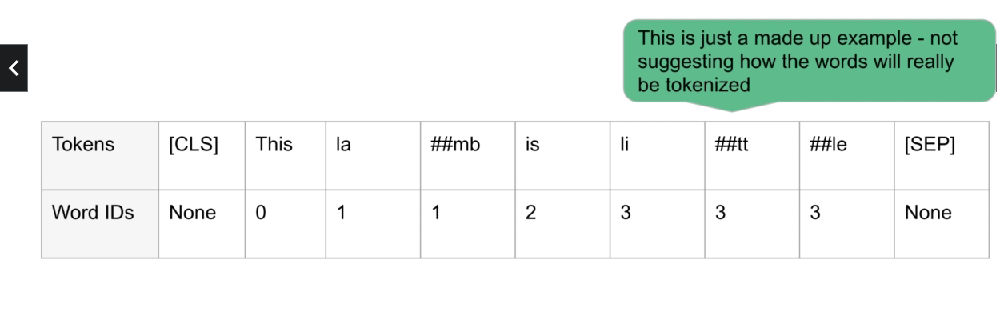

The expected is as above

B=beginning of the entity
I=Inside entity
O=outside entity

The algo we create should also take care of the below as given an example


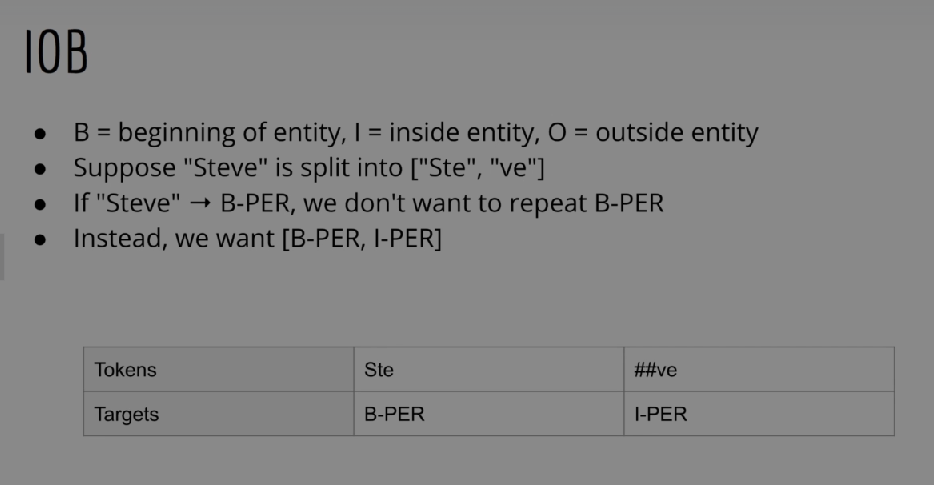

In [24]:
def align_targets(labels, word_ids):
  alligned_labels=[]; last_word=None
  for word in word_ids:
    if word is None:
      label=-100
    elif word!=last_word:
      label=labels[word] #It's a new word
    else:
      label=label[word] #it's the same word
      #Change the B-tag to I-Tag if necessary
    alligned_labels.append(label)
    last_word=word
  return alligned_labels

We need to add a truncation step and make it in batches

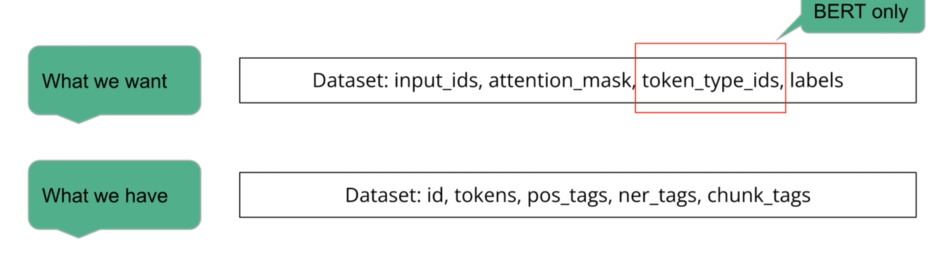

In [25]:
def tokenize_fn(batch):
  tokenized_inputs=tokenizer(
      batch['tokens'], truncation=True, is_split_into_words=True
  )
  labels_batch=batch['ner_tags']
  aligned_labels_batch=[]

  for i, labels in enumerate(labels_batch):
    word_ids=tokenized_inputs.word_ids(i)
    aligned_labels_batch.append(align_targets(labels, word_ids))
    tokenized_inputs['labels']=aligned_labels_batch
    return tokenized_inputs

In [27]:
t.word_ids()

[None, 0, 1, 2, 3, 4, 5, 6, 7, 7, 8, None]

In [28]:
begin2inside={
    1:2,
    3:4,
    5:6,
    7:8
}

In [33]:
def align_targets(labels, word_ids):
  alligned_labels=[]
  last_word=None
  for word in word_ids:
    if word is None:
      label=-100
    elif word!=last_word:
      label=labels[word] #It's a new word
    else:
      label=labels[word] #it's the same word
      #Change the B-tag to I-Tag if necessary
      if label in begin2inside:
        label=begin2inside[label]

    alligned_labels.append(label)
    last_word=word
  return alligned_labels

In [34]:
labels=data['train'][idx]['ner_tags']
word_ids=t.word_ids()
aligned_targets=align_targets(labels, word_ids)
aligned_targets

[-100, 3, 0, 7, 0, 0, 0, 7, 0, 0, 0, -100]

In [35]:
labels

[3, 0, 7, 0, 0, 0, 7, 0, 0]

In [37]:
aligned_labels=[label_names[t] if t>=0 else None for t in aligned_targets]
for x,y in zip(t.tokens(), aligned_labels):
  print(f"{x}\t{y}")

[CLS]	None
EU	B-ORG
rejects	O
German	B-MISC
call	O
to	O
boycott	O
British	B-MISC
la	O
##mb	O
.	O
[SEP]	None


In [39]:
#make up a fake input just to test it
words=[
    '[CLS]','Ger','##man', 'call','to','boycott','Micro','##soft','[SEP]'
]
word_ids=[None,0,0,1,2,3,4,4,None]
labels=[7,0,0,0,3]
aligned_targets=align_targets(labels, word_ids)
aligned_labels=[label_names[t] if t>=0 else None for t in aligned_targets]
for x, y in zip(words, aligned_labels):
  print(f"{x}\t{y}")

[CLS]	None
Ger	B-MISC
##man	I-MISC
call	O
to	O
boycott	O
Micro	B-ORG
##soft	I-ORG
[SEP]	None


In [46]:
def tokenize_fn(batch):
  tokenized_inputs=tokenizer(
      batch['tokens'], truncation=True, is_split_into_words=True
  )
  labels_batch=batch['ner_tags'] #Original Targets
  aligned_labels_batch=[]

  for i, labels in enumerate(labels_batch):
    word_ids=tokenized_inputs.word_ids(i)
    aligned_labels_batch.append(align_targets(labels, word_ids))
  tokenized_inputs['labels']=aligned_labels_batch
  return tokenized_inputs

In [47]:
data['train'].column_names

['id', 'tokens', 'pos_tags', 'chunk_tags', 'ner_tags']

We dont need the column names

In [48]:
tokenized_datasets=data.map(
    tokenize_fn,
    batched=True,
    remove_columns=data['train'].column_names,
)

Map:   0%|          | 0/14041 [00:00<?, ? examples/s]

Map:   0%|          | 0/3250 [00:00<?, ? examples/s]

Map:   0%|          | 0/3453 [00:00<?, ? examples/s]

In [49]:
tokenized_datasets

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 14041
    })
    validation: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 3250
    })
    test: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 3453
    })
})

### Data Collator
Consider our text preprocessing review: pad, truncate, torch tensors/TF Tensors. We dont really do it!

All of the above is done by data collator. Done only on the current batch and not whole data.It was working automatically behind the scenes

We will need to define a data collator manually as the one that is used by default is not useful

In [ ]:
from transformers import DataCollatorWithPadding
data_collator=DataCollatorWithPadding(tokenizer=tokenizer)
